In [1]:
!pip install wordcloud

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from nltk.tokenize import word_tokenize

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant

In [6]:
tweets = pd.read_csv("./d2.csv")

In [7]:
tweets.head()

,Post,Depressed
0,Our most-broken and least-understood rules is ...,1
1,"Regular Check-In Post. Plus, a reminder about ...",1
2,Fuck,1
3,Every day is a funeral that I mourn the person...,1
4,i hate myself,1


In [8]:
for i in range(10):
    tw = tweets.Post[i]
    lb = tweets.Depressed[i]
    print("{} - {}".format(tw, lb))

Our most-broken and least-understood rules is "helpers may not invite private contact as a first resort", so we've made a new wiki to explain it - 1
Regular Check-In Post. Plus, a reminder about the No-Activism Rule. - 1
Fuck - 1
Every day is a funeral that I mourn the person I used to be. - 1
i hate myself - 1
The other day my car died outside of a drive thru, and it locked the whole system when it shut down, meaning I couldn't push it out of the drive thru completely. Everyone honking at me in the background telling me to move, when I literally could not have pushed my car anymore. Too often I feel... - 1
After struggling for 30 years, I think I'm finally able to explain what my depression feels like. - 1
Fuck humanity - 1
I feel like the only reason I'm still alive is an obligation to others... - 1
For everyone out there. - 1


In [9]:
for i in range(len(tweets)-1, len(tweets)-10, -1):
    tw = tweets.Post[i]
    lb = tweets.Depressed[i]
    print("{} - {}".format(tw, lb))

 Why do we feel more tired doing nothing than when we are doing something. - 0
 Why is the URL of google searches so long, what does it all mean? - 0
 What the hell are birds doing screaming at 5am? - 0
ELI5 why is it easier for men to build muscle mass compared to woman? - 0
Eli5 file vs object vs block storage ( not cloud based ) - 0
: What physically happens in a hard drive when data is stored? - 0
 When and how did people start using the name "Jane/John Doe" as the default for an unidentified person? - 0
 How do Ozone machines work? - 0
 Why is it that when something pushes/pulls on me, I feel acceleration, but I don't feel acceleration from the earth's gravity? I feel a force pushing upward on me, but I don't feel a downward force. - 0


In [10]:
tweets = tweets.rename(columns={"Post":"tweet", "Depressed":"label"})

In [11]:
tweets.tweet = tweets.tweet.apply(lambda x : str(x))

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   13636 non-null  object
 1   label   13636 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 213.2+ KB


In [13]:
def plot_word_cloud(word_cloud):
    plt.figure(figsize=(10, 8), facecolor='k')
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig("./s1.png")
    plt.show()

In [14]:
from wordcloud import WordCloud

word_cloud = WordCloud(width = 512, height = 256, collocations=False, colormap="Blues")

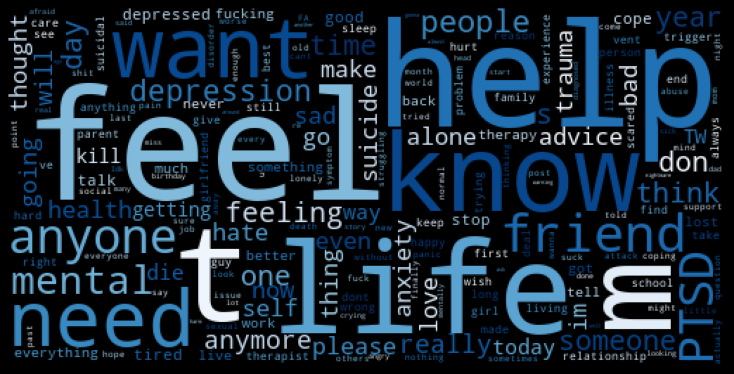

In [15]:
depressive_words = " ".join(list(tweets[tweets.label == 1].tweet))
depressive_wc = word_cloud.generate(depressive_words)
plot_word_cloud(depressive_wc)

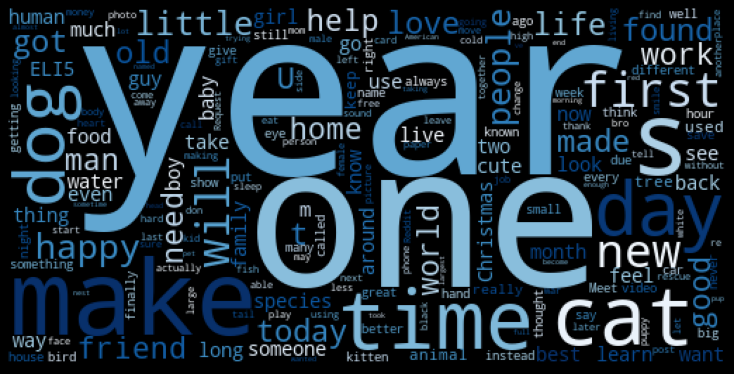

In [16]:
random_words = " ".join(list(tweets[tweets.label==0].tweet))
random_wc = word_cloud.generate(random_words)
plot_word_cloud(random_wc)

In [17]:
tweets = tweets.sample(frac=1)

In [18]:
tweets.head(10)

,tweet,label
7717,I’ve always been happier. But I worked hard to...,0
5452,just venting,1
2510,Help! My boyfriend’s dog killed mine and I don...,1
13160,What is vaping in an easy to understand way?,0
1508,There's barely any FA representation in media/...,1
12336,Los Angeles has more 4x the national average ...,0
5159,Just a cool concept,1
3535,Can i get free online therapy?,1
661,Smile,1
6179,What’s life,1


In [19]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
import re
import time
import string

def clean_text(text_data):  
    stop_words = set(stopwords.words('english'))      
            
    print()
    print("Processing.....")
    print()
    time.sleep(1)
    x=[]
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    # print(RE_EMOJI)
    for i in range(len(text_data)):
        q = text_data[i]
        q = RE_EMOJI.sub(r'', q)
        i = q.translate(str.maketrans('','',string.punctuation))
        
        x.append(i)
    print()
    print("Completed the processing of the text......")
    print()
    return x

In [20]:
x = tweets.tweet
y = tweets.label

x = clean_text(x)


Processing.....


Completed the processing of the text......



In [21]:
tweets.tweet.head(10)

7717     I’ve always been happier. But I worked hard to...
5452                                          just venting
2510     Help! My boyfriend’s dog killed mine and I don...
13160         What is vaping in an easy to understand way?
1508     There's barely any FA representation in media/...
12336     Los Angeles has more 4x the national average ...
5159                                   Just a cool concept
3535                        Can i get free online therapy?
661                                                  Smile
6179                                           What’s life
Name: tweet, dtype: object

In [22]:
# TODO: barplot of count_values()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print("Shape of x_train: ", len(x_train))
print("Shape of y_train: ", len(y_train))
print()
print("Shape of x_test: ", len(x_test))
print("Shape of y_test: ", len(y_test))

Shape of x_train:  10908
Shape of y_train:  10908

Shape of x_test:  2728
Shape of y_test:  2728


In [25]:
# TODO: plot distribution on train set

In [26]:
# TODO: plot distribution on test sets

In [27]:
def getaccuracy(predictions,actual):
    actual = np.array(actual)
    accuracy = np.count_nonzero((predictions==actual) == True)/len(actual)
    return accuracy*100

In [28]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

In [29]:
def getconfusionmatrix(predictions,actual,classes,title):
    nb_matrix = confusion_matrix(actual, predictions)
    precision = nb_matrix[1][1]/(nb_matrix[1][1]+nb_matrix[0][1])
    recall = nb_matrix[1][1]/(nb_matrix[1][1]+nb_matrix[1][0])
    f1_score = 2*precision*recall/(precision+recall)
    print(title)
    print(nb_matrix)
    print('Recall',recall)
    print('Precison',precision)
    print('F1 score',f1_score)
    print()
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(nb_matrix, classes=classes, title=title)

In [30]:
vectorizer = CountVectorizer(stop_words='english')

def mlmodel(x,y,x_test,y_test,mltype,vect):
    start_time = time.time()
    if vect==2:
        #vectorizer = CountVectorizer(stop_words='english')
        train_features = vectorizer.fit_transform(x)
        test_features = vectorizer.transform(x_test)
#         test_features = pad_sequences(test_features.toarray().tolist(), maxlen=train_features.shape[1], truncating="post", padding="post")
#         test_features = np.array(test_features)
        print(train_features.shape)
        print(test_features.shape)
    elif vect==1:
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(x)
        MAX_LENGTH=250
        train_features = tokenizer.texts_to_sequences(x)
        train_padded = pad_sequences(train_features, maxlen=MAX_LENGTH, truncating="post", padding="post")
        test_features = tokenizer.texts_to_sequences(x_test)
        test_padded = pad_sequences(test_features, maxlen=MAX_LENGTH, truncating="post", padding="post")
        train_features = np.array(train_padded)
        test_features = np.array(test_padded)
    
    actual = y
    if mltype=='Naive Bayes':
        from sklearn.naive_bayes import MultinomialNB
        model = MultinomialNB()
        model.fit(train_features, [int(r) for r in y])
    elif mltype=='SVM':
        from sklearn.svm import SVC
        model = SVC()
        model = model.fit(train_features, [int(r) for r in y])
    elif mltype=='Random Forest':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(max_depth=2, random_state=0)
        model = model.fit(train_features, [int(i) for i in y])
    
#     train_predictions = model.predict(vectorizer.transform(x))
#     test_predictions = model.predict(vectorizer.transform(x_test))
    
    train_predictions = model.predict(train_features)
    test_predictions = model.predict(test_features)

    train_accuracy = getaccuracy(train_predictions,actual)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual,classes,'Confusion matrix For '+mltype+' classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For '+mltype+' classifier for testing dataset')
    print("\n")
    # rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    # kn = format(metrics.auc(rrr, fff))
    # kn = float(kn)*100

    print(mltype," Accuracy for training datatset: \n", train_accuracy, "%")
    print(mltype," Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_time),5))
    print()
    print()
    return [model,mltype,train_accuracy,test_accuracy]

Confusion matrix For Naive Bayes classifier for training dataset
[[1690 3590]
 [1668 3960]]
Recall 0.7036247334754797
Precison 0.5245033112582781
F1 score 0.6010016694490817



Confusion matrix For Naive Bayes classifier for testing dataset
[[ 386  902]
 [ 424 1016]]
Recall 0.7055555555555556
Precison 0.529718456725756
F1 score 0.6051220964860037



Naive Bayes  Accuracy for training datatset: 
 51.796846351301795 %
Naive Bayes  Accuracy for testing datatset: 
 51.39296187683284 %
 Completion Speed 1.01293


Confusion matrix For SVM classifier for training dataset
[[1341 3939]
 [ 352 5276]]
Recall 0.937455579246624
Precison 0.5725447639717851
F1 score 0.710907498484134



Confusion matrix For SVM classifier for testing dataset
[[ 146 1142]
 [ 154 1286]]
Recall 0.8930555555555556
Precison 0.5296540362438221
F1 score 0.6649431230610134



SVM  Accuracy for training datatset: 
 60.66189952328567 %
SVM  Accuracy for testing datatset: 
 52.49266862170088 %
 Completion Speed 69.87689


Confu

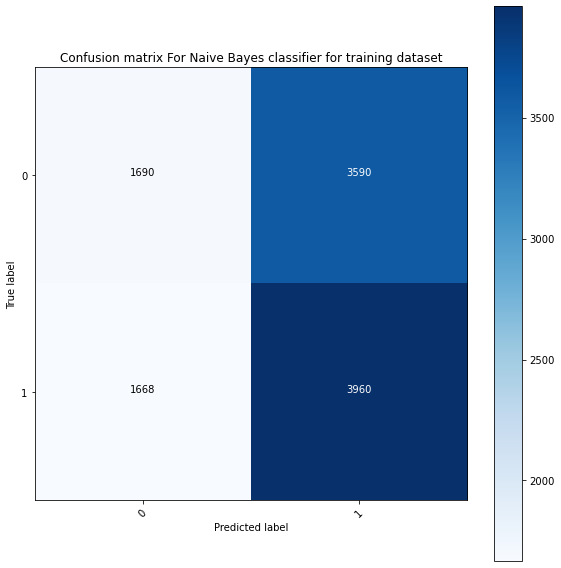

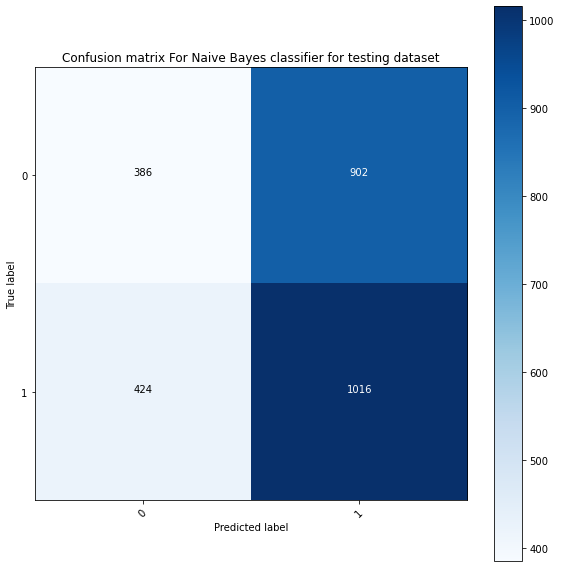

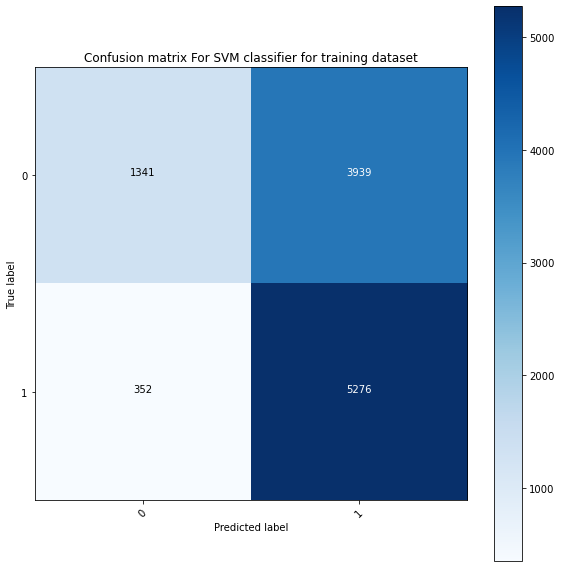

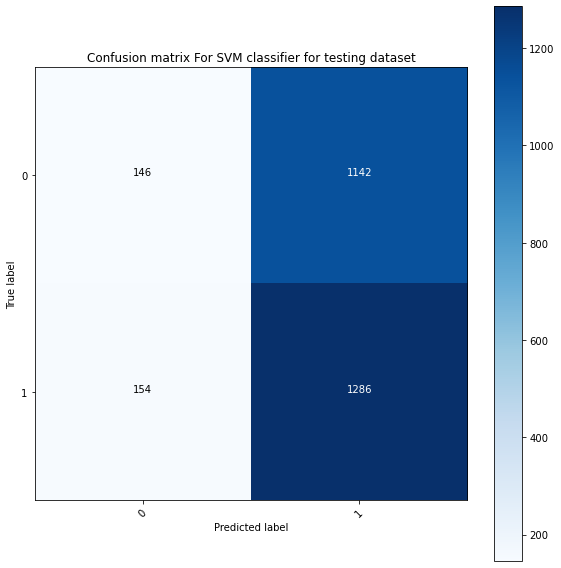

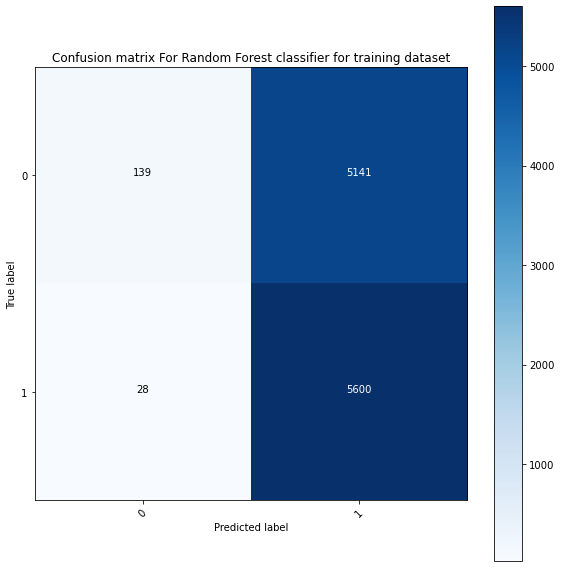

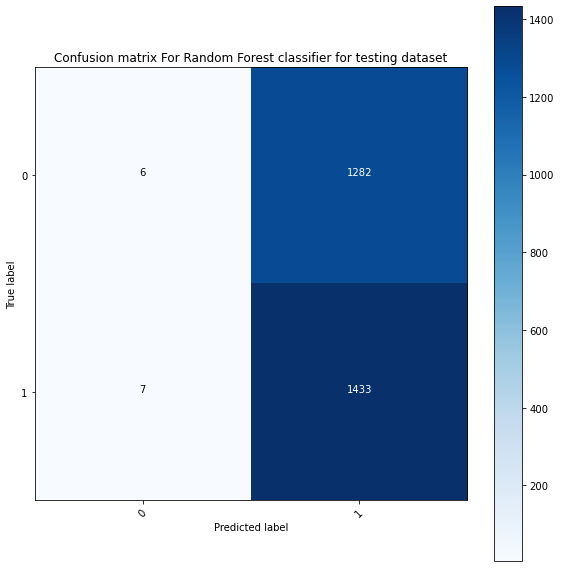

In [31]:
tokenizer_choice = 1 # 1 for Tokenizer, 2 for CountVectorizer
tokenizer_name = 'Tokenizer' if tokenizer_choice==1 else 'Count Tokenizer'

analysis=[]
trained_models = {}
mltype_list =['Naive Bayes','SVM','Random Forest']
for t in mltype_list:
    temp = mlmodel(x_train,y_train,x_test,y_test,t,vect=tokenizer_choice)
    trained_models[t] = temp[0]
    analysis.append(temp[1:])

In [32]:
#Random_Forest(x_train, y_train, x_test, y_test, vectorizer_choice)

In [33]:
#SVM(x_train, y_train, x_test, y_test, vectorizer_choice)

In [34]:
#Naive_Bayes(x_train, y_train, x_test, y_test, vectorizer_choice)

In [35]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
#analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       51.796846      51.392962
1            SVM       60.661900      52.492669
2  Random Forest       52.612761      52.749267


In [36]:
targets = {"1" : "depressed", "0" : "normal"}

def predict_label(text):
    for name, model in trained_models.items():
        prediction = model.predict(vectorizer.transform([text]))
        print()
        print("{} predicted the text as: {}".format(name, targets[prediction]))

In [37]:
neg_sent = "5 signs, you are suffering from depression"
predict_label(neg_sent)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
pos_sent = "I am normal. This is just to let you know."
predict_label(pos_sent)